هذا الملف تجربة للخطوات من موقع('https://www.youtube.com/watch?v=xi0vhXFPegw&ab_channel=RobMulla')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)اسلوب قديم تم تغييره بالسطر التالي بديب سييك
pd.set_option('display.max_columns', 200)
colors=["#9C92A8", "#A1DF11","#A0790E",'#E86262',"#11CC3F","#5D13A3"]

In [2]:
df=pd.read_csv("/home/hesham/NMG/8-25/cleaned_ncr_data8-25.csv")

## Step 1: Data Understanding
- Dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`


In [3]:
df.shape

(25, 32)

In [4]:
df.head(2)

,ID,Month,Record_Date,Source,100,Column1,Code,Column2,Forms_Used,Event_Area,Equipment_Tool,Department,Reporter_ID,Reporter_Name,Report_Editor,Description,Cause,Shift,Risk_Level,Sent,Corrective_Action,Applied_By,Target_Date,On_Progress,Follow_Up,Followed_By,Close_Date,Closed_On_Time,Penalty_Case,Unnamed: 29,Unnamed: 30,Notes
0,1,يوليو-25,2025-07-07,قوائم الفحص,NaN,NaN,N/1/7/7,NaN,NaN,المبني الاداري,الداتا سنتر,Administrative Affairs,13335,Ahmed Morsi Morsi,Mahmoud Fadlallah,تكرارتسريب مياه من وحدة التكييف بغرفة الداتا س...,من المحتمل أن يكون ذلك نتيجة انسداد متكرر في خ...,NaN,عالى,OK,اتخاذ إجراءات عاجلة ودائمة لمعالجة السبب الجذر...,Administrative Affairs,NaN,END,Closed,احمد مرسي مرسي,2025-07-14,NaN,NaN,NaN,NaN,NaN
1,2,يوليو-25,2025-07-07,قوائم الفحص,NaN,NaN,N/2/7/7,NaN,NaN,عنبر ويب2,ماكينة ويب 9,Web,14982,Ahmed Saad Tolba,Mahmoud Fadlallah,قطع في خرطوم الهواء الخاص باستيكر ويب 9,عدم القيام بالصيانة الدورية بشكل منتظم,NaN,متوسط,OK,اداء الصيانة الدورية بشكل منتظم,Engineering Department,NaN,END,Closed,محمد فؤاد خليل,2025-07-07,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['ID', 'Month', 'Record_Date', 'Source', '100', 'Column1', 'Code',
       'Column2', 'Forms_Used', 'Event_Area', 'Equipment_Tool', 'Department',
       'Reporter_ID', 'Reporter_Name', 'Report_Editor', 'Description', 'Cause',
       'Shift', 'Risk_Level', 'Sent', 'Corrective_Action', 'Applied_By',
       'Target_Date', 'On_Progress', 'Follow_Up', 'Followed_By', 'Close_Date',
       'Closed_On_Time', 'Penalty_Case', 'Unnamed: 29', 'Unnamed: 30',
       'Notes'],
      dtype='object')

In [6]:
df.dtypes

ID                     int64
Month                 object
Record_Date           object
Source                object
100                  float64
Column1              float64
Code                  object
Column2              float64
Forms_Used           float64
Event_Area            object
Equipment_Tool        object
Department            object
Reporter_ID            int64
Reporter_Name         object
Report_Editor         object
Description           object
Cause                 object
Shift                float64
Risk_Level            object
Sent                  object
Corrective_Action     object
Applied_By            object
Target_Date          float64
On_Progress           object
Follow_Up             object
Followed_By           object
Close_Date            object
Closed_On_Time       float64
Penalty_Case         float64
Unnamed: 29          float64
Unnamed: 30          float64
Notes                float64
dtype: object

In [7]:
df.describe()

,ID,100,Column1,Column2,Forms_Used,Reporter_ID,Shift,Target_Date,Closed_On_Time,Penalty_Case,Unnamed: 29,Unnamed: 30,Notes
count,25.000000,0.0,0.0,0.0,0.0,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,13.000000,NaN,NaN,NaN,NaN,13695.760000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.359801,NaN,NaN,NaN,NaN,919.997929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,12212.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.000000,NaN,NaN,NaN,NaN,13335.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,13.000000,NaN,NaN,NaN,NaN,13335.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,19.000000,NaN,NaN,NaN,NaN,14548.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,25.000000,NaN,NaN,NaN,NaN,15082.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 2: Data Preperation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [8]:
df=df[['ID', 'Month', 'Record_Date', 
     #'Source', '100', 'Column1', 
     'Code',
      # 'Column2', 'Forms_Used', 'Event_Area', 'Equipment_Tool',
      'Department','Reporter_ID', 'Reporter_Name',
       # 'Report_Editor',
       'Description',
        # 'Cause','Shift',
         'Risk_Level',
         #'Sent', 'Corrective_Action', 'Applied_By', 'Target_Date', 'On_Progress',
         'Follow_Up', 
         #'Followed_By',
          'Close_Date',
       #'Closed_On_Time', 'Penalty_Case', 'Unnamed: 29', 'Unnamed: 30',
       #'Notes'
       ]].copy()

In [9]:
df.head(2)

,ID,Month,Record_Date,Code,Department,Reporter_ID,Reporter_Name,Description,Risk_Level,Follow_Up,Close_Date
0,1,يوليو-25,2025-07-07,N/1/7/7,Administrative Affairs,13335,Ahmed Morsi Morsi,تكرارتسريب مياه من وحدة التكييف بغرفة الداتا س...,عالى,Closed,2025-07-14
1,2,يوليو-25,2025-07-07,N/2/7/7,Web,14982,Ahmed Saad Tolba,قطع في خرطوم الهواء الخاص باستيكر ويب 9,متوسط,Closed,2025-07-07


In [10]:
Department_Shortening={'Administrative Affairs':'Administrative',
                       'Engineering Department':'Engineering'}

df['Department']=df['Department'].replace(Department_Shortening)

In [11]:
df['Record_Date'] = pd.to_datetime(df['Record_Date'])

In [12]:
df['Close_Date'] = pd.to_datetime(df['Close_Date'])

In [13]:
df['time_close'] = df['Close_Date'] - df['Record_Date']
df.head(2)

,ID,Month,Record_Date,Code,Department,Reporter_ID,Reporter_Name,Description,Risk_Level,Follow_Up,Close_Date,time_close
0,1,يوليو-25,2025-07-07,N/1/7/7,Administrative,13335,Ahmed Morsi Morsi,تكرارتسريب مياه من وحدة التكييف بغرفة الداتا س...,عالى,Closed,2025-07-14,7 days
1,2,يوليو-25,2025-07-07,N/2/7/7,Web,14982,Ahmed Saad Tolba,قطع في خرطوم الهواء الخاص باستيكر ويب 9,متوسط,Closed,2025-07-07,0 days


In [14]:
df['time_close_days'] = (pd.to_datetime(df['Close_Date']) - pd.to_datetime(df['Record_Date'])).dt.days
df.head(2)

,ID,Month,Record_Date,Code,Department,Reporter_ID,Reporter_Name,Description,Risk_Level,Follow_Up,Close_Date,time_close,time_close_days
0,1,يوليو-25,2025-07-07,N/1/7/7,Administrative,13335,Ahmed Morsi Morsi,تكرارتسريب مياه من وحدة التكييف بغرفة الداتا س...,عالى,Closed,2025-07-14,7 days,7.0
1,2,يوليو-25,2025-07-07,N/2/7/7,Web,14982,Ahmed Saad Tolba,قطع في خرطوم الهواء الخاص باستيكر ويب 9,متوسط,Closed,2025-07-07,0 days,0.0


In [15]:
df.to_csv('my_data_fream.csv', index=False)

In [16]:
df.dtypes

ID                           int64
Month                       object
Record_Date         datetime64[ns]
Code                        object
Department                  object
Reporter_ID                  int64
Reporter_Name               object
Description                 object
Risk_Level                  object
Follow_Up                   object
Close_Date          datetime64[ns]
time_close         timedelta64[ns]
time_close_days            float64
dtype: object

In [17]:
df['Follow_Up'].value_counts()

Follow_Up
Closed    23
Opened     2
Name: count, dtype: int64

In [18]:
df['Department'].value_counts()


Department
Web               10
Engineering        5
Administrative     4
Binding            2
Production         1
Sheet Printing     1
IT                 1
Stores             1
Name: count, dtype: int64

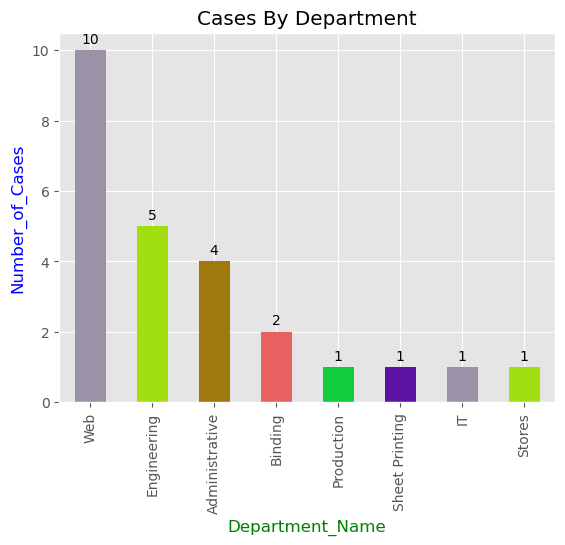

In [19]:
ax=df['Department'].value_counts().plot(kind='bar',title='Cases By Department',color=colors)
ax.set_xlabel('Department_Name',color='g')
ax.set_ylabel('Number_of_Cases',color='b')
for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)

In [20]:
df['Risk_Level'].value_counts()

Risk_Level
متوسط    18
عالى      7
Name: count, dtype: int64

In [21]:
df['Month'].value_counts()

Month
يوليو-25    13
أغسطس-25    12
Name: count, dtype: int64

In [22]:
df['Reporter_Name'].value_counts().to_csv('reporter8.csv',index=True)

<Axes: xlabel='Department', ylabel='Reporter_Name'>

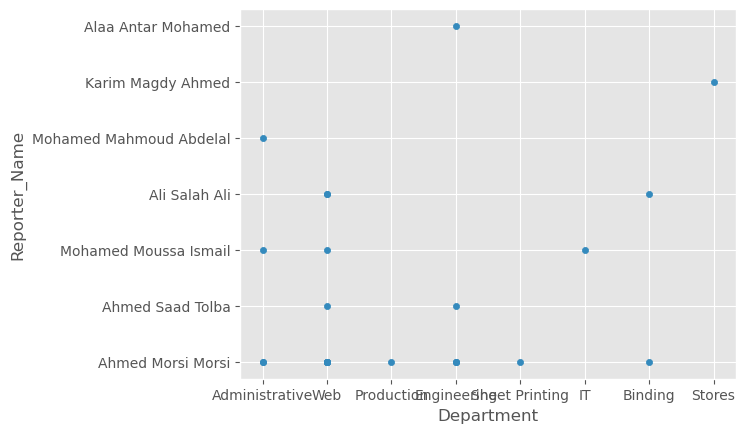

In [23]:
df.plot(kind='scatter',x='Department',y='Reporter_Name')

In [24]:
df.columns

Index(['ID', 'Month', 'Record_Date', 'Code', 'Department', 'Reporter_ID',
       'Reporter_Name', 'Description', 'Risk_Level', 'Follow_Up', 'Close_Date',
       'time_close', 'time_close_days'],
      dtype='object')

In [ ]:
df['Description'][df['Reporter_Name']=='Ahmed Morsi Morsi'][df['Risk_Level']=='عالى']


0     تكرارتسريب مياه من وحدة التكييف بغرفة الداتا س...
8     لوحة كهرباء مفتوحة وبدون مرآة حماية عازلة مع ت...
23                            تسريب مياه من ثلاجة ويب 6
24                       تسريب حبر من تانك اللون الاحمر
Name: Description, dtype: object

In [27]:
# import matplotlib.pyplot as plt

# # استخدام ستايلات مختلفة
# plt.style.use('seaborn')
# plt.style.use('classic')
# plt.style.use('dark_background')

In [28]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


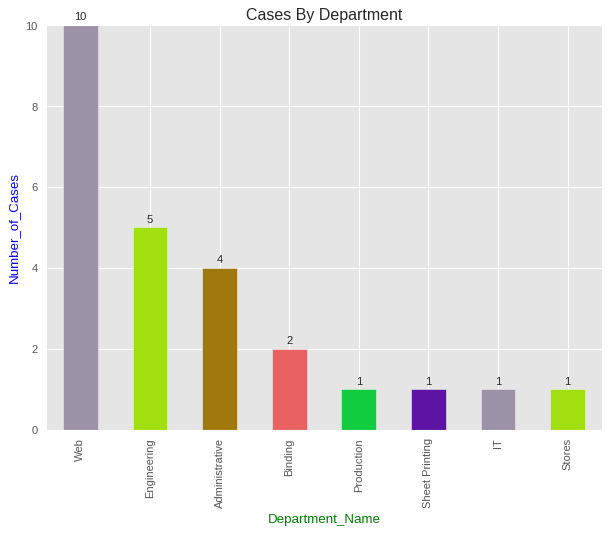

In [49]:
ax=df['Department'].value_counts().plot(kind='bar',title='Cases By Department',color=colors)
ax.set_xlabel('Department_Name',color='g')
ax.set_ylabel('Number_of_Cases',color='b')
plt.style.use( 'seaborn-v0_8-bright')
for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)